In [ ]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random

d = 5
time_a = pd.date_range('2016-09-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-09-01 00:00:14', periods=5760*d, freq='15S')
# print time_b

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

####### set databases to empty #########
query_empty = """truncate table device.water_heater""" 
c.execute(query_empty)
print "device.water_heater are Empty!!! \n"

query = "SELECT watt FROM collected_info.5_water_heater WHERE no >= '%s'   AND no <= '%s'; "% (0,1000)
df = pd.read_sql(query, conn)


#### Random the number of turnon-time per day
def manytime():
    many  = ['0'] * 50 + ['1'] * 30 + ['2'] * 20  ## The number of turn-on time of this appliance 
    manytime = random.choice(many)
    print "in recent day turn on water_heater",manytime,"times\n" 
    if (int(manytime) == 0):
        off_item = [0]
        return (off_item)
    
    elif (int(manytime) == 1):
        x,y,endx,endy = 20,23,1,59
        open_hour =  random.randint(x, y)
        open_min =  random.randint(0, 59)
        open_sec =  random.randint(0, 59)
        if 0 < open_sec  <= 15:
            k = 0
        elif 15 < open_sec  <= 30:
            k = 1
        elif 30 < open_sec  <= 45:
            k = 2
        else:
            k = 3
        off_item = (int(open_hour)*240) + (int(open_min)*4)+ k 
        print "time to turn-on appliacne on",open_hour,":",open_min,":",open_sec,"equal to",off_item,"items"
            
        duration_hour =  random.randint(0, 0)
        duration_min =  random.randint(endx, endy)
        duration_sec =  random.randint(0, 59)
        seconds = (duration_hour*3600)+(duration_min*60)+duration_sec
        no_item = seconds/15
        print "consuming the appliance", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item,"items\n" 
        return (off_item,no_item)
              
    else :
        x,y,endx,endy = 7,10,1,59
        open_hour =  random.randint(x, y)
        open_min =  random.randint(0, 59)
        open_sec =  random.randint(0, 59)
        if 0 < open_sec  <= 15:
            k = 0
        elif 15 < open_sec  <= 30:
            k = 1
        elif 30 < open_sec  <= 45:
            k = 2
        else:
            k = 3
        off_item = (int(open_hour)*240) + (int(open_min)*4)+ k 
        print "time to turn-on appliacne on",open_hour,":",open_min,":",open_sec,"equal to",off_item,"items"
            
        duration_hour =  random.randint(0, 0)
        duration_min =  random.randint(endx, endy)
        duration_sec =  random.randint(0, 59)
        seconds = (duration_hour*3600)+(duration_min*60)+duration_sec
        no_item = seconds/15
        print "consuming the appliance", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item,"items\n"
            
        x1,y1,endx1,endy1 = 20,23,1,59
        open_hour1 =  random.randint(x1, y1)
        open_min1 =  random.randint(0, 59)
        open_sec1 =  random.randint(0, 59)
        if 0 < open_sec1  <= 15:
            k = 0
        elif 15 < open_sec1  <= 30:
            k = 1
        elif 30 < open_sec1  <= 45:
            k = 2
        else:
            k = 3
        off_item1 = (int(open_hour1)*240) + (int(open_min1)*4)+ k 
        print "time to turn-on appliacne on",open_hour1,":",open_min1,":",open_sec1,"equal to",off_item1,"items"   
            
        duration_hour1 =  random.randint(0, 0)
        duration_min1 =  random.randint(endx1, endy1)
        duration_sec1 =  random.randint(0, 59)
        seconds1 = (duration_hour1*3600)+(duration_min1*60)+duration_sec1
        no_item1 = seconds1/15
        print "consuming the appliance", duration_hour1,"hours",duration_min1,"minutes",duration_sec1,"seconds that equal to",seconds1,"seconds or",no_item1,"items\n"
        return (off_item,no_item,off_item1,no_item1)        
    
        
days = 1
j = 0    
i = 0
turn = manytime()

while (j <= (5760*d)-1):   
    if (j == 5760+(5760*(days-1))):
        days +=1
        i = 0
        print "-------------------------ENd-----------------------------\n"
        turn = manytime()       
           

    if len(turn) == 1 :
        c.execute("INSERT INTO device.water_heater (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
        conn.commit()
        j += 1

    elif len(turn)== 2 :
        off_item = turn[0] 
        no_item = turn[1]
        if (off_item+(5760*(days-1)) <= j <= (no_item+off_item)+(5760*(days-1))):
            c.execute("INSERT INTO device.water_heater (Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
            conn.commit()
            i += 1 
            j += 1
        else:
            c.execute("INSERT INTO device.water_heater (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
            conn.commit()
            j += 1
            i = 0
              
    else:
        off_item = turn[0] 
        no_item = turn[1]
        off_item1 = turn[2] 
        no_item1 = turn[3]
        if (off_item+(5760*(days-1)) <= j <= (no_item+off_item)+(5760*(days-1)) or off_item1+(5760*(days-1)) <= j <= (no_item1+off_item1)+(5760*(days-1))):
            c.execute("INSERT INTO device.water_heater(Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
            conn.commit()
            j += 1
            i += 1 
        else:
            c.execute("INSERT INTO device.water_heater(Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
            conn.commit()
            j += 1     
            i = 0
            

print "DONE!"
# print df

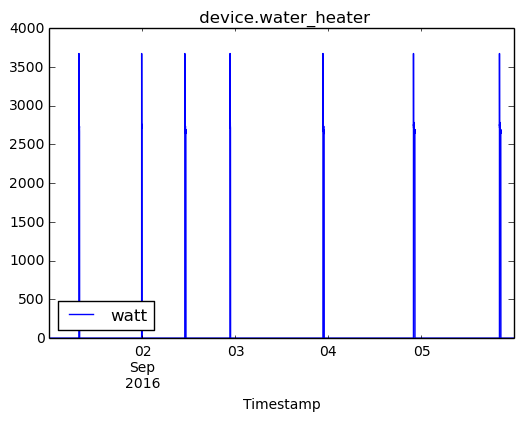

28800


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline  


# query = "SELECT watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query = "SELECT Timestamp,watt FROM device.water_heater WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
df = pd.read_sql(query, conn, index_col=['Timestamp'])
fig, ax = plt.subplots()
ax.set_title(' device.water_heater')
df.plot(ax=ax )
plt.show()
df.to_csv('file.csv')
print len(df)


In [11]:
df.watt[5578]

0